In [1]:
import cv2
import matplotlib.pyplot as plt

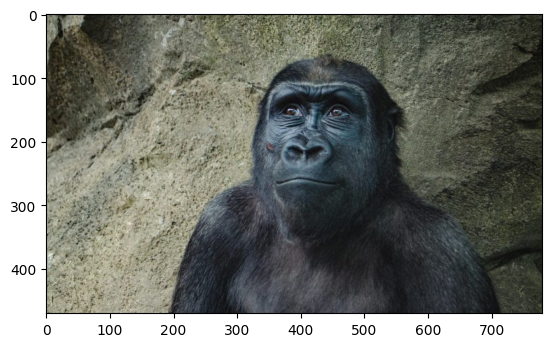

In [2]:
img1 = cv2.imread('/home/verlo/dev_ws/OpenCV/data/gorilla.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1);

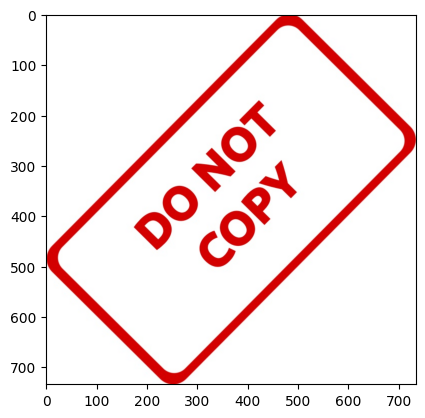

In [3]:
img2 = cv2.imread('/home/verlo/dev_ws/OpenCV/data/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2);

In [5]:
img1.shape, img2.shape

((470, 780, 3), (734, 734, 3))

In [6]:
blended = cv2.addWeighted(src1=img1, alpha=0.5, src2=img2, beta=0.5, gamma=0)
plt.imshow(blended);

error: OpenCV(4.9.0) /io/opencv/modules/core/src/arithm.cpp:647: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'


In [7]:
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
img1.shape, img2.shape

((470, 780, 3), (470, 780, 3))

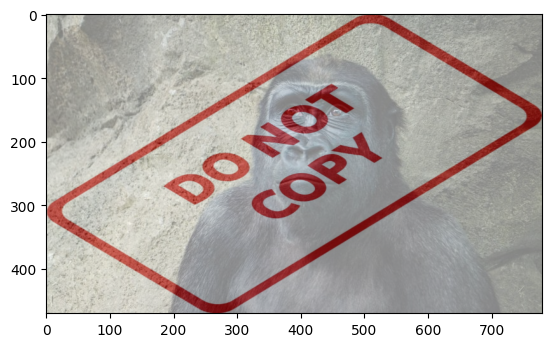

In [8]:
blended = cv2.addWeighted(src1=img1, alpha=0.5, src2=img2, beta=0.5, gamma=0)
plt.imshow(blended);

In [9]:
large_img = img1
small_img = img2

x_offset = 0
y_offset = 0

In [10]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

large_img[y_offset:y_end, x_offset:x_end] = small_img

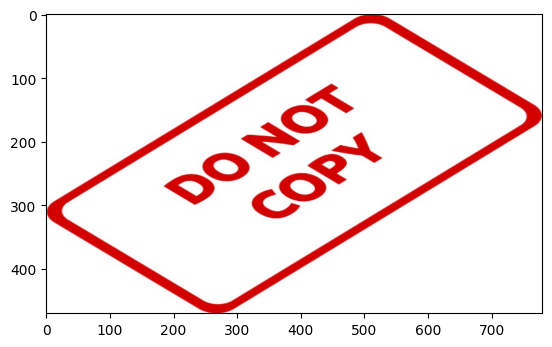

In [13]:
plt.imshow(large_img);

In [31]:
img1 = cv2.imread('/home/verlo/dev_ws/OpenCV/data/gorilla.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('/home/verlo/dev_ws/OpenCV/data/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (200,200))

img1.shape, img2.shape

((470, 780, 3), (200, 200, 3))

In [32]:
x_offset = img1.shape[1] - img2.shape[1]
y_offset = img1.shape[0] - img2.shape[0]
x_offset, y_offset

(580, 270)

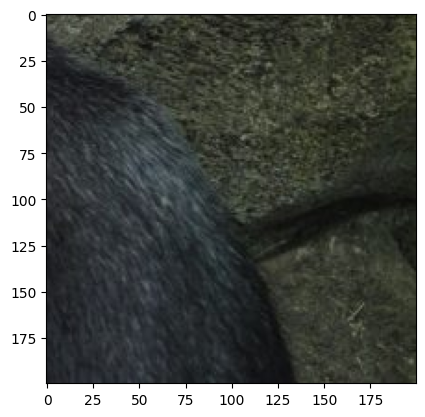

In [33]:
roi = img1[y_offset:img1.shape[0], x_offset:img1.shape[1]]
plt.imshow(roi);

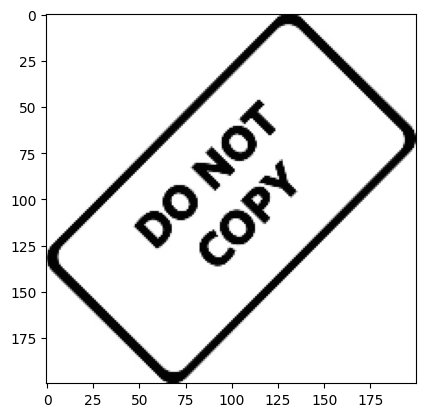

In [34]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2_gray, cmap='gray');

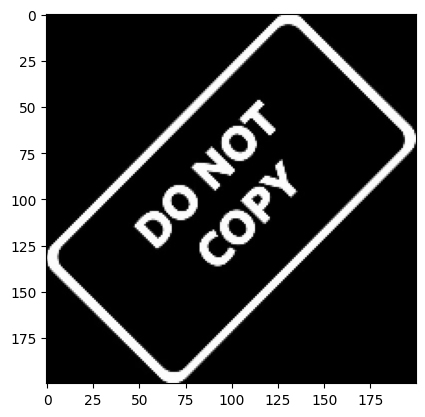

In [35]:
mask_inv = cv2.bitwise_not(img2_gray)
plt.imshow(mask_inv, cmap='gray');

In [36]:
mask_inv.shape

(200, 200)

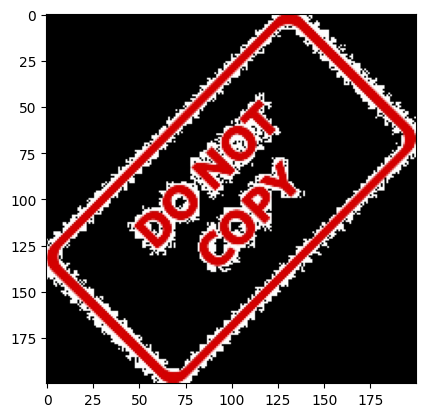

In [37]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)
plt.imshow(fg)

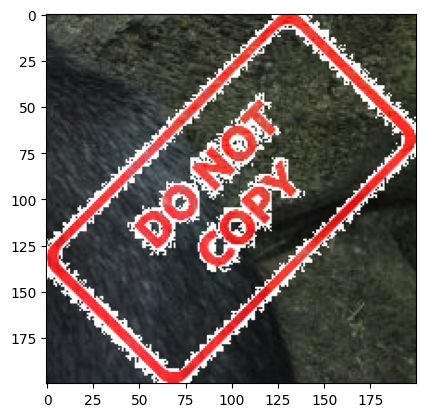

In [38]:
final_roi = cv2.bitwise_or(roi, fg)
plt.imshow(final_roi);

In [24]:
roi.shape

(130, 600, 3)

In [39]:
fg.shape

(200, 200, 3)

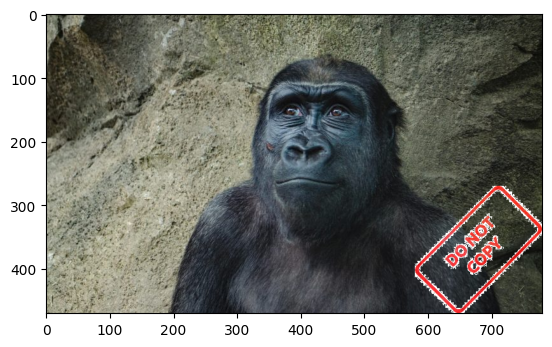

In [40]:
img1[y_offset:y_offset+img2.shape[0], x_offset:x_offset+img2.shape[1]] = final_roi
plt.imshow(img1);

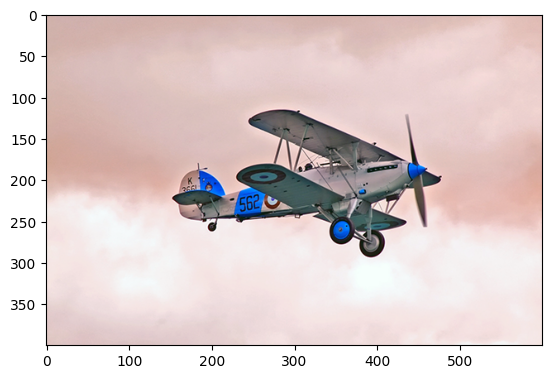

In [41]:
src = cv2.imread('/home/verlo/dev_ws/OpenCV/data/airplane.bmp', cv2.IMREAD_COLOR)
plt.imshow(src);

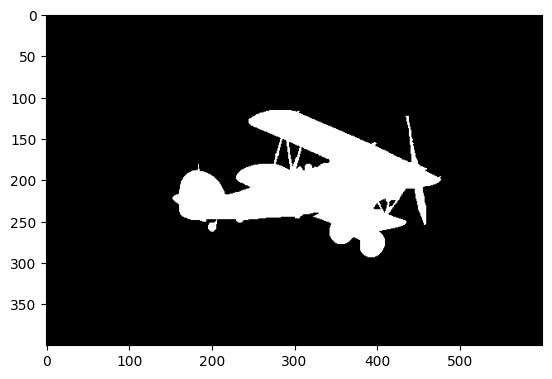

In [46]:
mask = cv2.imread('/home/verlo/dev_ws/OpenCV/data/mask_plane.bmp', cv2.IMREAD_GRAYSCALE)
plt.imshow(mask, cmap='gray');

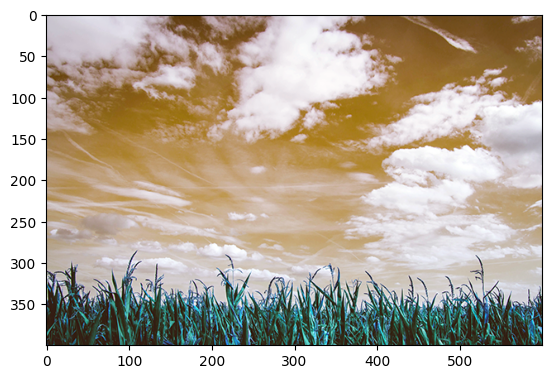

In [61]:
dst = cv2.imread('/home/verlo/dev_ws/OpenCV/data/field.bmp', cv2.IMREAD_COLOR)
plt.imshow(dst);

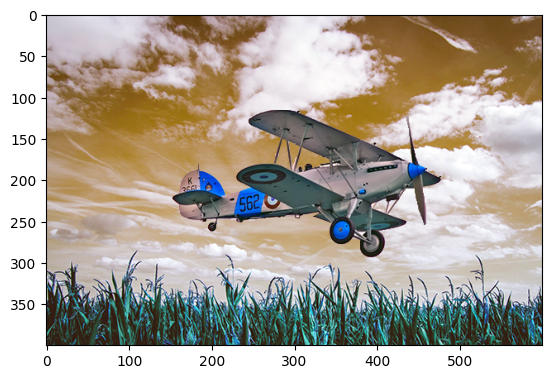

In [62]:
plt.imshow(cv2.copyTo(src, mask, dst));

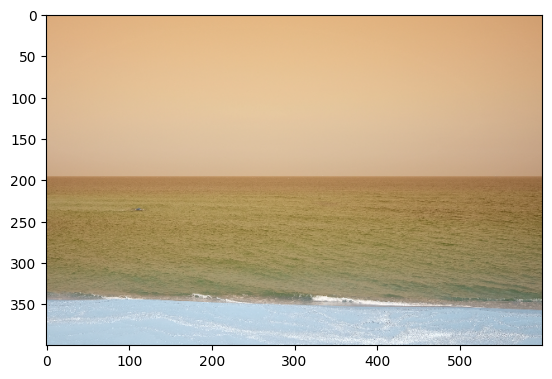

In [67]:
dst = cv2.imread('/home/verlo/dev_ws/OpenCV/data/sky.bmp', cv2.IMREAD_COLOR)
resize_dst = cv2.resize(dst, (600,400))
plt.imshow(resize_dst);

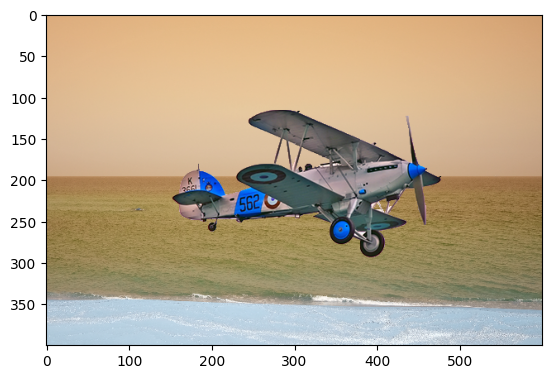

In [68]:
plt.imshow(cv2.copyTo(src, mask, resize_dst));